In [2]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans,MiniBatchKMeans

In [4]:
# create synthetic data
X0 = np.random.rand(1000,2)+0.9
X1 = np.random.rand(1000,2)
X = np.concatenate((X0,X1))

[[ 1.40607922  1.40042542]
 [ 0.50228645  0.49858214]]


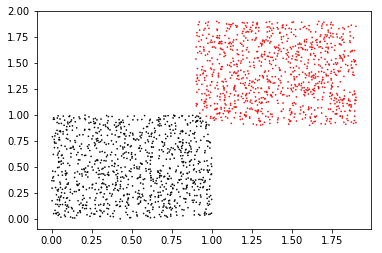

In [5]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)

print kmeans.cluster_centers_
colors = ['red','blue','black']
plt.scatter(
    X[:,0],
    X[:,1],
    s=0.4,
    c=kmeans.labels_, 
    cmap=matplotlib.colors.ListedColormap(colors))

0.594469710733


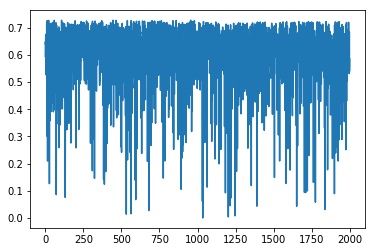

In [7]:
from sklearn.metrics import silhouette_score, silhouette_samples

# print overall silhouette score
print silhouette_score(X,kmeans.labels_)

# plot silhouette score per sample
ss = silhouette_samples(X,kmeans.labels_)
plt.plot(ss)

In [8]:
from sklearn.mixture import GaussianMixture

# create+fit a GMM with 2 components and diagonal covariances
gmm = GaussianMixture(n_components=2, covariance_type='diag').fit(X)

In [9]:
# probability of each sample belonging to GMM component 0 and 1
gmm.predict_proba(X)

array([[  9.99954517e-01,   4.54833343e-05],
       [  9.99368790e-01,   6.31209786e-04],
       [  9.99997359e-01,   2.64115978e-06],
       ..., 
       [  4.17529754e-06,   9.99995825e-01],
       [  5.39868634e-04,   9.99460131e-01],
       [  2.62441656e-03,   9.97375583e-01]])

In [15]:
# fit two separate 2-component GMMs to X0 and X1, e.g., assuming that 
# X0 has samples from class 0 and X1 has samples from class 1 
gmm0 = GaussianMixture(n_components=2, covariance_type='diag').fit(X0)
gmm1 = GaussianMixture(n_components=2, covariance_type='diag').fit(X1)

from scipy.misc import logsumexp

# create a sample point
T = np.random.rand(1,2)+0.5

# compute the posterior probabilities
#     p(m=0|T) 
#     p(m=1|T)
# using the log-sum-exp trick.
p_0_x = np.exp(gmm0.score_samples(T) - logsumexp(np.array([gmm0.score_samples(T),gmm1.score_samples(T)]).flatten()))
p_1_x = np.exp(gmm1.score_samples(T) - logsumexp(np.array([gmm0.score_samples(T),gmm1.score_samples(T)]).flatten()))
print p_0_x, p_1_x, np.sum([p_0_x, p_1_x])

[ 0.89763356] [ 0.10236644] 1.0
